# **1. Data Exploration and Preprocessing:**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
df = pd.read_csv('customer_segmentation.csv')

df.head()

,CustomerID,Age,AnnualIncome,SpendingScore
0,1,22,15000,39
1,2,35,40000,81
2,3,26,30000,77
3,4,40,50000,40
4,5,55,100000,6


In [7]:
print(df.head())


   CustomerID  Age  AnnualIncome  SpendingScore
0           1   22         15000             39
1           2   35         40000             81
2           3   26         30000             77
3           4   40         50000             40
4           5   55        100000              6


In [8]:
print(df.isnull().sum())

CustomerID       0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


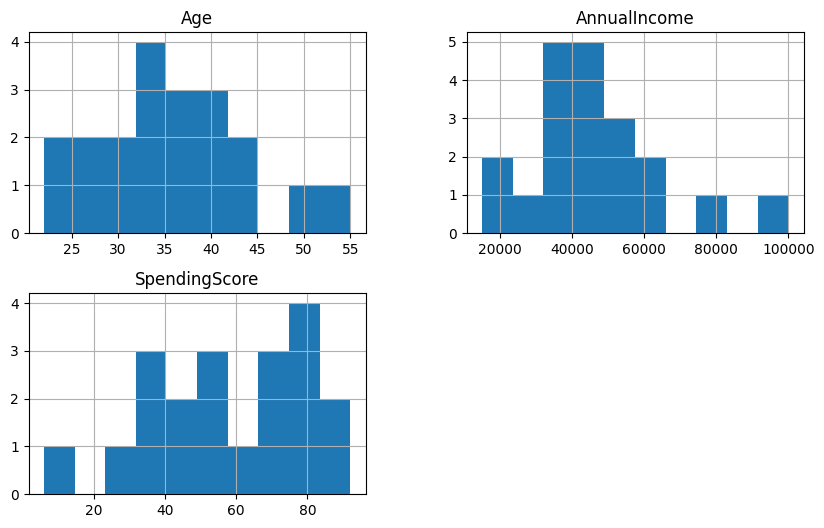

In [9]:
df[['Age', 'AnnualIncome', 'SpendingScore']].hist(bins=10, figsize=(10, 6))
plt.show()


In [10]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Age', 'AnnualIncome', 'SpendingScore']])


In [11]:
df_scaled = pd.DataFrame(scaled_data, columns=['Age', 'AnnualIncome', 'SpendingScore'])
print(df_scaled.head())


        Age  AnnualIncome  SpendingScore
0 -1.658204     -1.641181      -0.894674
1 -0.096128     -0.300347       1.032316
2 -1.177565     -0.836681       0.848794
3  0.504671      0.235987      -0.848794
4  2.307066      2.917656      -2.408738


# **2. Model Development:**

In [12]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


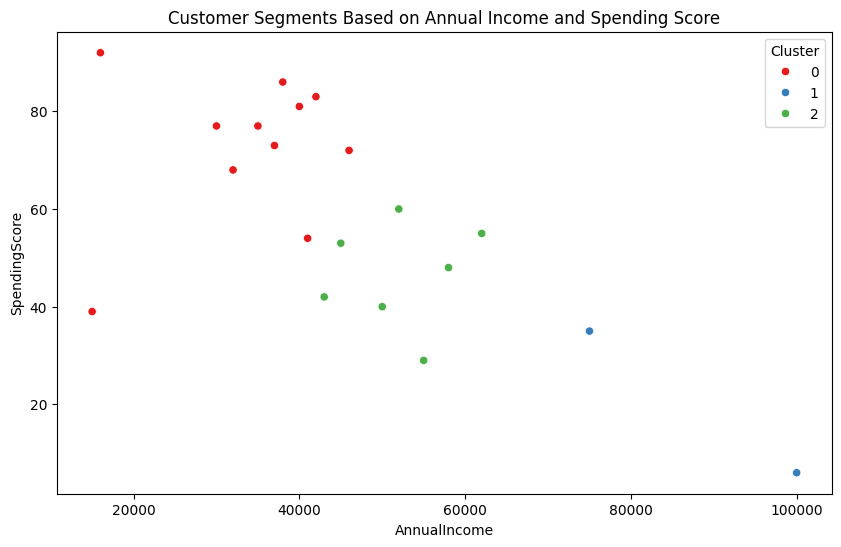

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Segments Based on Annual Income and Spending Score')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

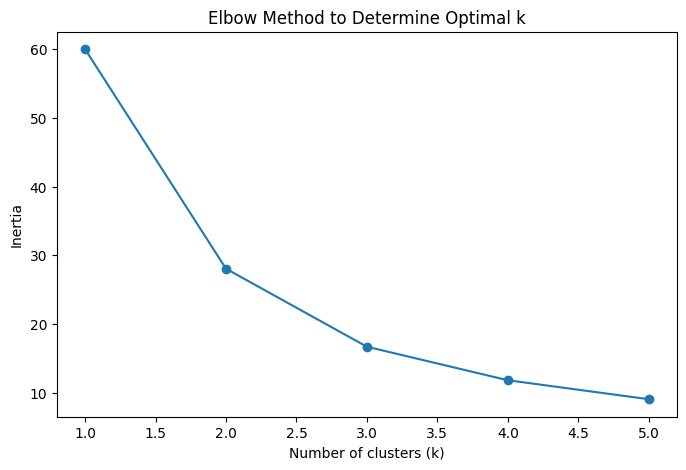

In [16]:
inertia = []
k_values = range(1, 6)
for k in k_values:

      kmeans = KMeans(n_clusters=k, random_state=42)
      kmeans.fit(df_scaled)
      inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()


# **3. Model Evaluation:**


In [17]:
for k in range(2, 6):

  kmeans = KMeans(n_clusters=k, random_state=42)
  clusters = kmeans.fit_predict(df_scaled)
  silhouette_avg = silhouette_score(df_scaled, clusters)
  print(f'For k={k}, the silhouette score is {silhouette_avg:.3f}')

For k=2, the silhouette score is 0.431
For k=3, the silhouette score is 0.396
For k=4, the silhouette score is 0.402
For k=5, the silhouette score is 0.350


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


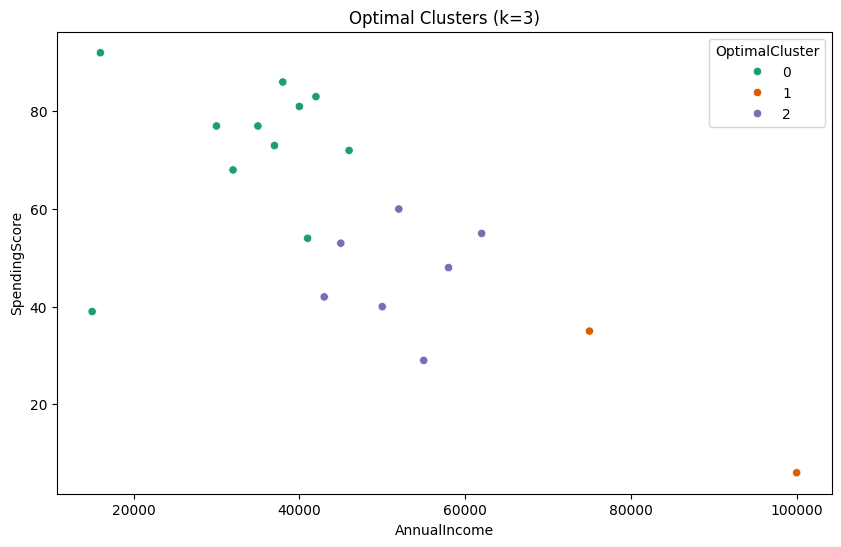

In [26]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['OptimalCluster'] = kmeans.fit_predict(df_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot (x='AnnualIncome', y='SpendingScore', hue='OptimalCluster', data=df, palette='Dark2')
plt.title(f'Optimal Clusters (k={optimal_k})')
plt.show()



In [27]:
cluster_summary = df.groupby('OptimalCluster').mean()
print(cluster_summary)

                CustomerID        Age  AnnualIncome  SpendingScore  Cluster
OptimalCluster                                                             
0                 9.272727  30.090909  33818.181818      72.909091      0.0
1                 6.000000  52.500000  87500.000000      20.500000      1.0
2                13.714286  40.000000  52142.857143      46.714286      2.0
